# Quantification of animal interactions
## - determining attraction
## - computing a neighborhood map

In [98]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Let's load trajectories of two interacting fish.**

The data has the following format:

x1, y1, p1, x2, y2, p2

(x,y are the coordinates of the animals 1 and 2 at each time point, p is irrelevant).

In [4]:
tra=np.loadtxt('trajectories_day5.txt')
tra.shape

(218922, 6)

In [6]:
#for easier access to the data of each animal, let's put the trajectories into separate variables:
an1=tra[:,[0,1]]
an2=tra[:,[3,4]]

print(an1)

[[120.57 316.43]
 [120.83 316.55]
 [122.71 318.84]
 ...
 [385.22 180.54]
 [385.3  180.38]
 [385.54 180.34]]


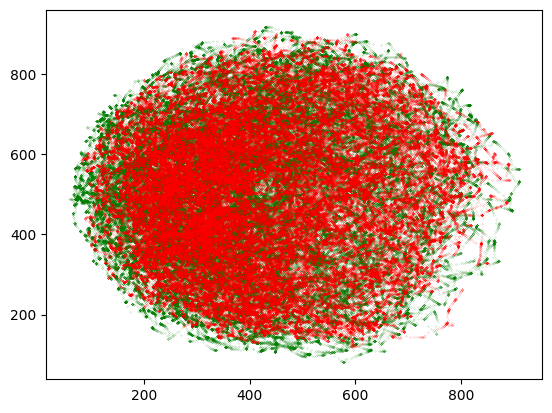

In [7]:
# As always, let's first take a look where the animals went
# for example by using an x,y, scatter plot
plt.scatter(an1[:,0],an1[:,1],color='g',s=0.01)
plt.scatter(an2[:,0],an2[:,1],color='r',s=0.01)

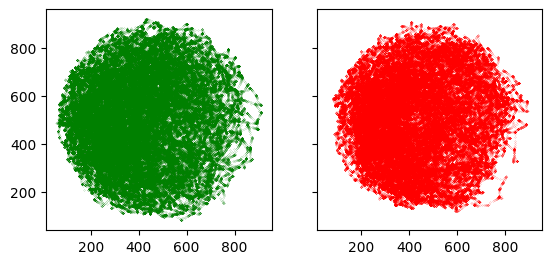

In [27]:
#let's plot them separately 

fig,axes =plt.subplots(1,2, sharex=True, sharey=True) #create two subplots side by side

axes[0].scatter(an1[:,0],an1[:,1],color='g',s=0.01, alpha = 1) #plot the first animal in green
axes[0].set_aspect('equal') #set axes to equal scale
axes[1].scatter(an2[:,0],an2[:,1],color='r',s=0.01, alpha = 1)
axes[1].set_aspect('equal')

# Quantifying attraction

- It looks like both animals explored the arena more or less evenly and equally.
- Let's analyze the interaction by checking if they were closer together than chance levels

In [55]:
# lets calculate the **observed** distance between the two animals:

diff_12=an1-an2
dist=np.sqrt(diff_12[:,0]**2+diff_12[:,1]**2)

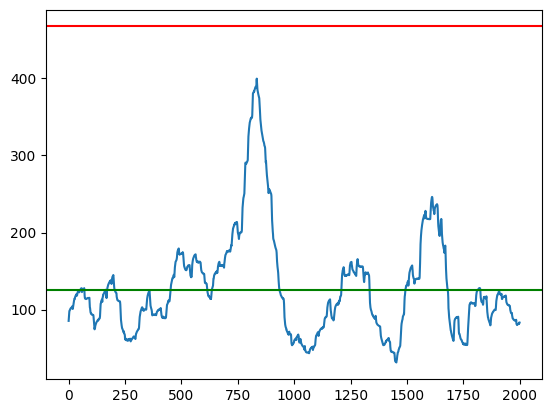

In [49]:
plt.plot(dist[5000:7000])
#plt.plot(dist)
plt.axhline(dist.mean(),color='g')
plt.axhline(dist.max(),color='r')

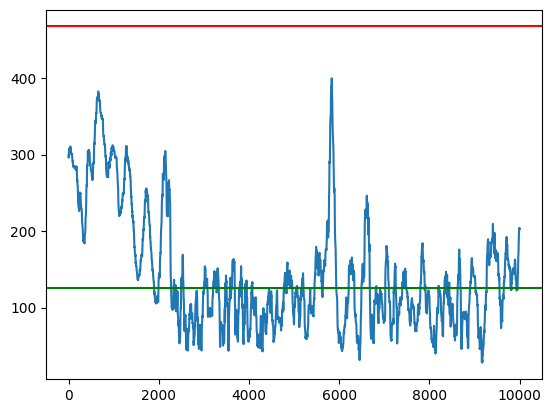

In [109]:
plt.plot(dist[0:10000])
#plt.plot(dist)
plt.axhline(dist.mean(),color='g')
plt.axhline(dist.max(),color='r')

In [56]:
print(dist.mean())

125.30440925242222


In [113]:
# how do we know that this is lower or greater than chance level?
# one option is by computing a chance level *expected* distance for comparison.
# try to understand the code below


nShift=10
distShift=np.zeros(nShift)
for i in range(nShift):
    shift=(i+1)*5000
    an2_shift=np.roll(an2,shift,axis=0)
    diff_12s=an1-an2_shift
    dist_12s=np.sqrt(diff_12s[:,0]**2+diff_12s[:,1]**2)
    distShift[i]=np.mean(dist_12s)

In [101]:
distShift

array([293.96162943, 299.80483832, 311.44231024, 300.74873112,
       306.15009949, 299.40407773, 305.14626248, 309.73321871,
       304.07142114, 295.09075886])

## How different is the expected distance from the observed distance?

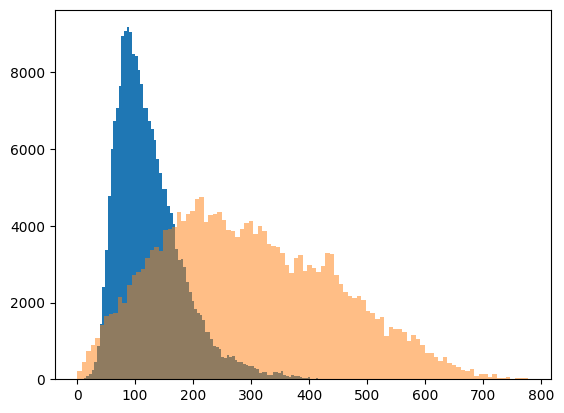

In [115]:
#Let's look at that visually using distributions:
plt.hist(dist,bins=100);
plt.hist(dist_12s,bins=100,alpha=0.5);

In [97]:
#Let's compare at all the shifted distances to the observed:
#for this we will use another data structure:
# the pandas dataframe:

allDist=np.append(distShift,dist.mean())
df=pd.DataFrame(allDist,columns=['dist'])
df['type']='shifted'
df.loc[10,'type']='observed'
df


,dist,type
0,293.961629,shifted
1,299.804838,shifted
2,311.442310,shifted
3,300.748731,shifted
4,306.150099,shifted
5,299.404078,shifted
6,305.146262,shifted
7,309.733219,shifted
8,304.071421,shifted
9,295.090759,shifted


(0.0, 350.0)

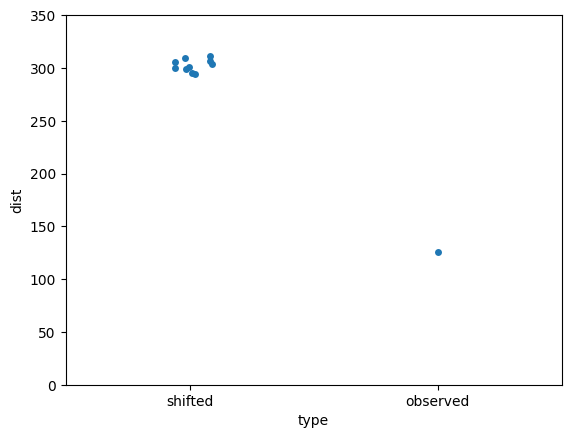

In [116]:
# Once the data is in this table format, seaborn can conveniently generate summary plots:
# The logic is then similar to R 'tapply'
sns.stripplot(data=df,x='type',y='dist')
plt.ylim([0,350])

(0.0, 350.0)

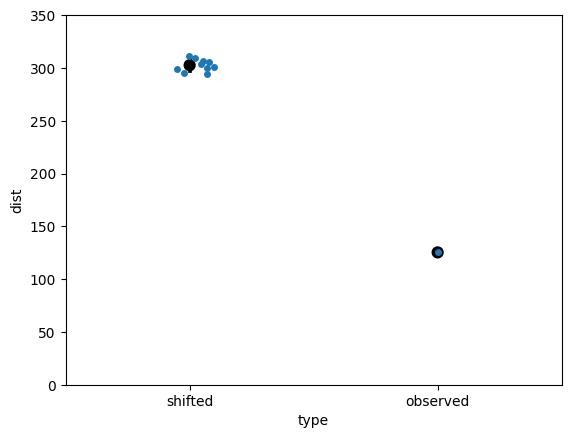

In [108]:
sns.pointplot(data=df,x='type',y='dist', join=False, errorbar='sd', color='k')
sns.stripplot(data=df,x='type',y='dist')
plt.ylim([0,350])

In [119]:
#Attraction index
#Let's quantify HOW much attraction we see:

#(expected-observed)/expected

attraction=(allDist.mean()-dist.mean())/allDist.mean()
print(attraction)

0.5625481668241205


In [120]:
# This means that the distance is ~56% lower than what we would expect by chance!

# Let's compute a neighborhood map!

- This means to compute egocentric coordinates for animal 1
- ... For this, we need to put animal 1 at the center of the world
- ... and rotate the world so that animal 1 faces up
- ... ... For this we need to determine the heading of animal 1
- ... ... ... let's assume the animals move only forward

In [121]:
dx = np.diff(an1[:,0])
dy = np.diff(an1[:,1])
distances = np.sqrt(dx**2 + dy**2)
speeds = distances / 1

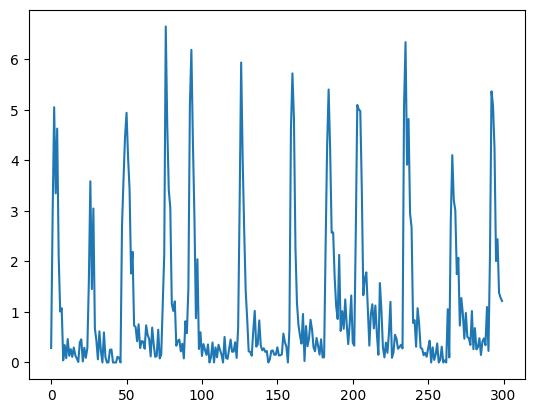

In [ ]:
plt.plot(speeds[:300])

In [ ]:
def speed(position)

In [176]:
angles_radians = np.arctan2(dy, dx)
angles_radians

array([ 0.43240778,  0.8834045 ,  2.28757867, ...,  0.        ,
       -1.10714872, -0.16514868])

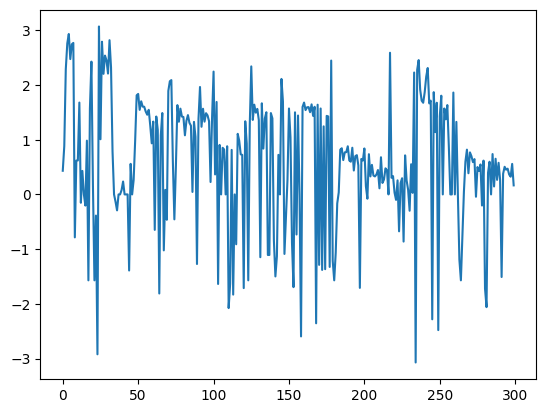

In [177]:
plt.plot(angles_radians[:300])

In [178]:
def moving_average_2d(data, window_size):
    """Compute the moving average of a 2D array (data) across each column."""
    # Initialize an empty array to store the smoothed data
    smoothed_data = np.empty((data.shape[0] - window_size + 1, data.shape[1]))
    
    # Apply moving average for each column
    for i in range(data.shape[1]):  # Iterate over columns
        smoothed_data[:, i] = np.convolve(data[:, i], np.ones(window_size) / window_size, mode='valid')
    
    return smoothed_data


In [179]:
window_size=10

an1s=moving_average_2d(an1,window_size)
an2s=moving_average_2d(an2,window_size)

smoothed_x = an1s[:,0]
smoothed_y = an1s[:,1]

# Calculate differences in smoothed x and y
dxs = np.diff(smoothed_x)
dys = np.diff(smoothed_y)
distancess = np.sqrt(dxs**2 + dys**2)
speedss = distancess / 1

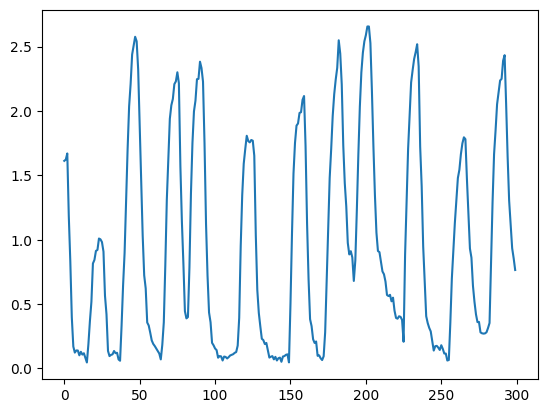

In [180]:
plt.plot(speedss[:300])

In [181]:
angles_radianss = np.arctan2(dys, dxs)

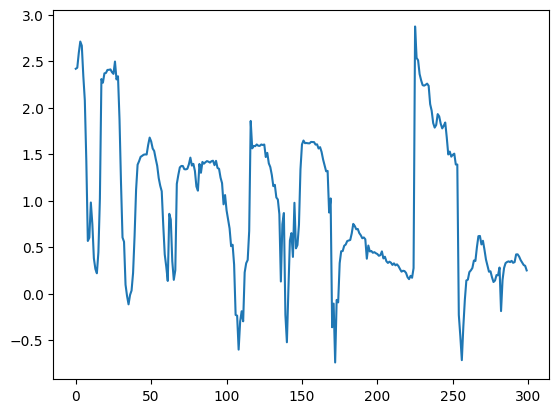

In [182]:
plt.plot(angles_radianss[:300])

In [183]:
def cart2pol(x, y):
    theta = np.arctan2(y, x)
    rho = np.hypot(x, y)
    return theta, rho

In [184]:
def pol2cart(theta, rho):
    x = rho * np.cos(theta)
    y = rho * np.sin(theta)
    return x, y

In [185]:
pos1RelativeToNeighbor=an2s-an1s


In [186]:
pos1RelativeToNeighbor_cart=cart2pol(*pos1RelativeToNeighbor.T)
pos1RelativeToNeighbor_cart



(array([0.33415415, 0.32949056, 0.32485253, ..., 2.53836832, 2.53872638,
        2.53916742]),
 array([302.1981665 , 303.03401754, 303.89539654, ..., 198.86808196,
        198.91860357, 199.07792124]))

In [187]:
rotation=pos1RelativeToNeighbor_cart[0][:-1]-angles_radianss

In [188]:
rotation

array([-2.08434974, -2.09999897, -2.26379046, ...,  2.64314516,
        2.62977952,  2.63689466])

In [189]:
pos1RelativeToNeighbor_rot=pol2cart(rotation,pos1RelativeToNeighbor_cart[1][:-1])

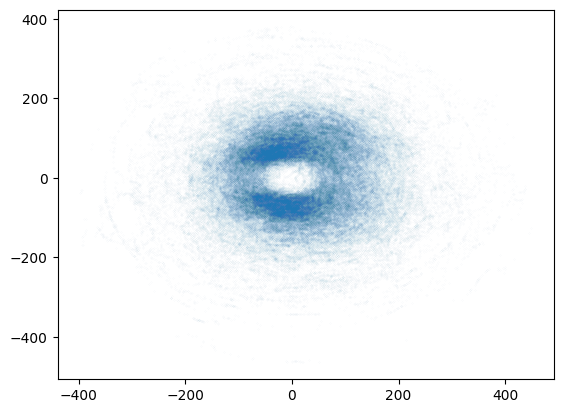

In [190]:
plt.scatter(pos1RelativeToNeighbor_rot[0],pos1RelativeToNeighbor_rot[1],s=0.01,alpha=0.1)